In [91]:
import imars3d

from imars3d.backend.dataio.data import load_data, _get_filelist_by_dir
import os

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib notebook

# Input location 

In [47]:
ct_dir = "/HFIR/CG1D/IPTS-23788/raw/ct_scans/Aug24_2020"
assert os.path.exists(ct_dir)

ob_dir = "/HFIR/CG1D/IPTS-23788/raw/ob/Aug24_2020"
assert os.path.exists(ob_dir)

dc_dir = "/HFIR/CG1D/IPTS-23788/raw/df/Aug24_2020"
assert os.path.exists(dc_dir)

In [93]:
list_ct_files, list_ob_files, list_dc_files = _get_filelist_by_dir(ct_dir=ct_dir,
                                    ob_dir=ob_dir,
                                    dc_dir=dc_dir)

In [102]:
list_ct_files, list_ob_files, list_dc_diles = _get_filelist_by_dir(ct_dir=ct_dir,
                                    ob_dir=ob_dir,
                                    )

dc_dir is None.


In [48]:
%%time

ct, ob, dc, rot_angles = load_data(ct_dir=ct_dir,
                                   ob_dir=ob_dir,
                                   dc_dir=dc_dir,
                                   ct_fnmatch="*.tiff",
                                   ob_fnmatch="*.tiff",
                                   dc_fnmatch="*.tiff")

ct:   0%|          | 0/1290 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 9.23 s, sys: 28.9 s, total: 38.1 s
Wall time: 47.5 s


In [49]:
rot_angles

array([0.0000e+00, 2.8000e-01, 5.6000e-01, ..., 3.6036e+02, 3.6064e+02,
       3.6092e+02])

# visualize imported data 

<IPython.core.display.Javascript object>


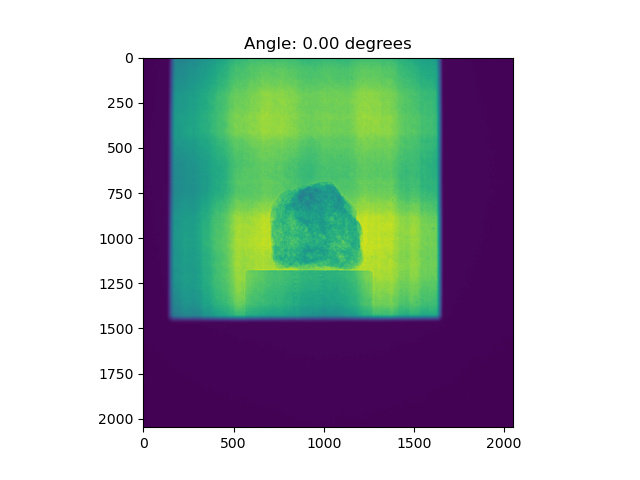

interactive(children=(IntSlider(value=0, description='index', max=1290), Output()), _dom_classes=('widget-inte…

In [50]:
plt.figure(1)

def plot_ct(index):
    plt.title(f"Angle: {rot_angles[index]:.2f} degrees")
    plt.imshow(ct[index])
    plt.show()
    
ct_plot_ui = interactive(plot_ct,
                        index=widgets.IntSlider(min=0,
                                               max=len(ct),
                                               value=0))
display(ct_plot_ui)

## OB 

<IPython.core.display.Javascript object>


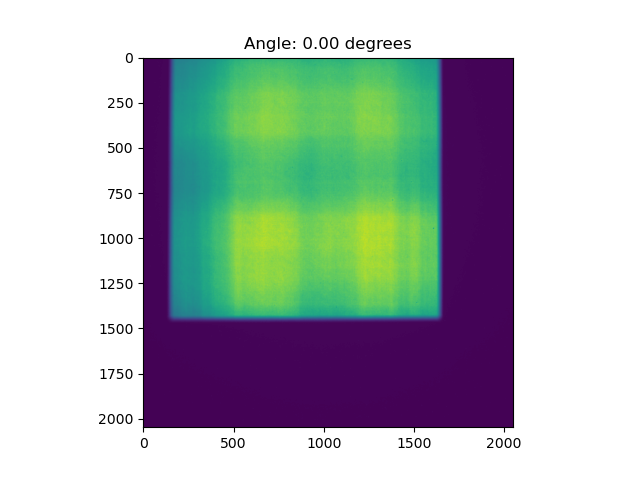

interactive(children=(IntSlider(value=0, description='index', max=10), Output()), _dom_classes=('widget-intera…

In [51]:
plt.figure(2)

def plot_ob(index):
    plt.title(f"Angle: {rot_angles[index]:.2f} degrees")
    plt.imshow(ob[index])
    plt.show()
    
ob_plot_ui = interactive(plot_ob,
                        index=widgets.IntSlider(min=0,
                                               max=len(ob),
                                               value=0))
display(ob_plot_ui)

# Crop

In [52]:
from imars3d.backend.morph.crop import crop

In [53]:
crop_region = [136, 1658, 0, 1466]    # [left, right, top, bottom]

In [54]:
%%time
ct = crop(arrays=ct,
         crop_limit=crop_region)
ob = crop(arrays=ob,
         crop_limit=crop_region)
dc = crop(arrays=dc,
         crop_limit=crop_region)

CPU times: user 2.37 ms, sys: 918 µs, total: 3.29 ms
Wall time: 3.1 ms


<IPython.core.display.Javascript object>


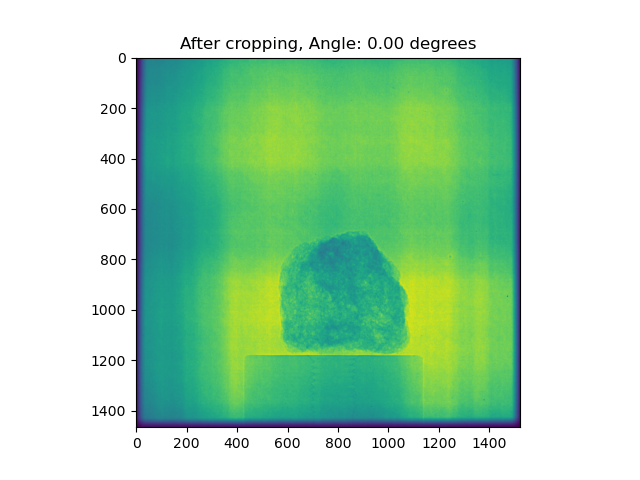

interactive(children=(IntSlider(value=0, description='index', max=1290), Output()), _dom_classes=('widget-inte…

In [55]:
plt.figure(3)

def plot_ct(index):
    plt.title(f"After cropping, Angle: {rot_angles[index]:.2f} degrees")
    plt.imshow(ct[index])
    plt.show()
    
ct_plot_ui = interactive(plot_ct,
                        index=widgets.IntSlider(min=0,
                                               max=len(ct),
                                               value=0))
display(ct_plot_ui)

## Gamma filtering 

In [56]:
from imars3d.backend.corrections.gamma_filter import gamma_filter

In [57]:
%%time
ct = gamma_filter(arrays=ct)
ob = gamma_filter(arrays=ob)
dc = gamma_filter(arrays=dc)

CPU times: user 19min 28s, sys: 1min 1s, total: 20min 29s
Wall time: 4min 10s


In [59]:
import numpy as np

In [60]:
print(f"np.shape(ct): {np.shape(ct)}")
print(f"{np.shape(ob) =}")
print(f"{np.shape(dc) =}")

np.shape(ct): (1290, 1466, 1522)
np.shape(ob) =(10, 1466, 1522)
np.shape(dc) =(10, 1466, 1522)


# Normalization

In [62]:
from imars3d.backend.preparation.normalization import normalization

In [63]:
%%time
ct_normalized = normalization(arrays=ct,
                             flats=ob,
                             darks=dc)

CPU times: user 11.3 s, sys: 15.6 s, total: 26.9 s
Wall time: 5.48 s


<IPython.core.display.Javascript object>


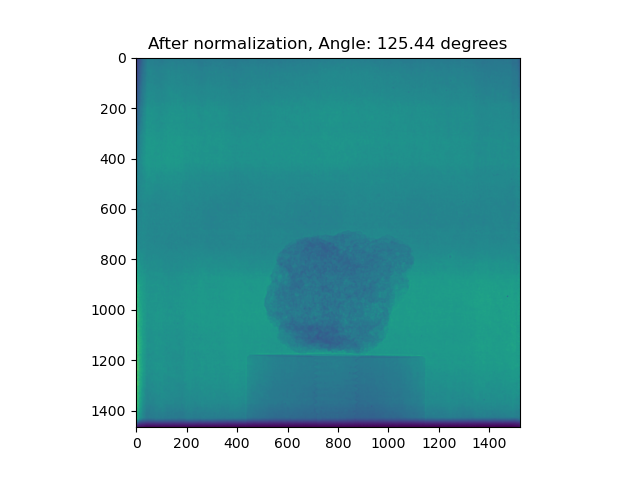

interactive(children=(IntSlider(value=0, description='index', max=1290), Output()), _dom_classes=('widget-inte…

In [64]:
plt.figure(4)

def plot_ct(index):
    plt.title(f"After normalization, Angle: {rot_angles[index]:.2f} degrees")
    plt.imshow(ct_normalized[index])
    plt.show()
    
ct_plot_ui = interactive(plot_ct,
                        index=widgets.IntSlider(min=0,
                                               max=len(ct),
                                               value=0))
display(ct_plot_ui)

# Beam fluctuations

In [66]:
from imars3d.backend.corrections.intensity_fluctuation_correction import intensity_fluctuation_correction


In [67]:
%%time
ct = intensity_fluctuation_correction(ct=ct_normalized)

CPU times: user 5.17 s, sys: 18.3 s, total: 23.4 s
Wall time: 27.5 s


<IPython.core.display.Javascript object>


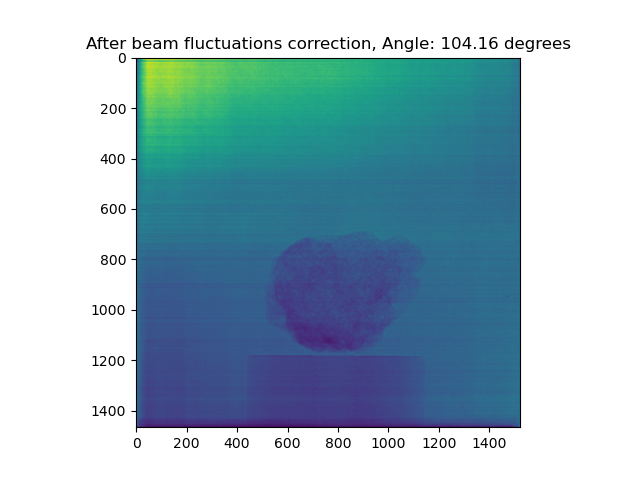

interactive(children=(IntSlider(value=0, description='index', max=1290), Output()), _dom_classes=('widget-inte…

In [68]:
plt.figure(5)

def plot_ct(index):
    plt.title(f"After beam fluctuations correction, Angle: {rot_angles[index]:.2f} degrees")
    plt.imshow(ct[index])
    plt.show()
    
ct_plot_ui = interactive(plot_ct,
                        index=widgets.IntSlider(min=0,
                                               max=len(ct),
                                               value=0))
display(ct_plot_ui)

# Filter noise 

In [71]:
# Do not run this on analysis machine... it's taking forever!

In [69]:
#from imars3d.backend.corrections.denoise import denoise

In [70]:
#%%time
#ct = denoise(arrays=ct)

/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/imars3d/backend/corrections/denoise.py:163: TqdmWarning: Iterable length 1290 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  rst = process_map(


denoise_by_bilateral:   0%|          | 0/1290 [00:00<?, ?it/s]

CPU times: user 28.5 s, sys: 57.9 s, total: 1min 26s
Wall time: 1h 3min 51s


In [78]:
#plt.figure(6)

#def plot_ct(index):
#    plt.title(f"After denoising, Angle: {rot_angles[index]:.2f} degrees")
#    plt.imshow(ct[index])
#    plt.show()
    
#ct_plot_ui = interactive(plot_ct,
#                        index=widgets.IntSlider(min=0,
#                                               max=len(ct),
#                                               value=0))
#display(ct_plot_ui)

In [72]:
# from transmission to attenuation 

In [73]:
# Remove outliers (kind of gamma filtering and more)

In [74]:
# Ring artifact removal 

In [104]:
from imars3d.backend.corrections.ring_removal import remove_ring_artifact

In [105]:
%%time
ct = remove_ring_artifact(arrays=ct)

/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/imars3d/backend/corrections/ring_removal.py:108: TqdmWarning: Iterable length 1466 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  rst = process_map(


Removing ring artifact:   0%|          | 0/1466 [00:00<?, ?it/s]

CPU times: user 43.8 s, sys: 55.6 s, total: 1min 39s
Wall time: 1min 42s


In [76]:
# find rotation center

In [106]:
from imars3d.backend.diagnostics.rotation import find_rotation_center

In [81]:
%%time
rot_center = find_rotation_center(arrays=ct,
                                 angles=rot_angles,
                                 in_degrees=True,
                                 atol_deg=1e-3)

print(f"{rot_center =}")

Finding rotation center: 0it [00:00, ?it/s]

/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# tilt correction

In [115]:
from imars3d.backend.diagnostics.tilt import find_180_deg_pairs_idx
from imars3d.backend.diagnostics.tilt import apply_tilt_correction
from imars3d.backend.diagnostics.tilt import calculate_tilt

In [86]:
list_opposite_angles = find_180_deg_pairs_idx(angles=rot_angles,
                                             atol=0.5)

In [87]:
list_opposite_angles

(array([  0,   0,   0, ..., 646, 646, 647]),
 array([ 642,  643,  644, ..., 1288, 1289, 1289]))

In [90]:
index_0_degree = list_opposite_angles[0][0]
index_180_degree = list_opposite_angles[1][0]

In [107]:
list_ct_files, list_ob_files, list_dc_diles = _get_filelist_by_dir(ct_dir=ct_dir,
                                    ob_dir=ob_dir,
                                    )

dc_dir is None.


In [112]:
file_0_degree =  list_ct_files[index_0_degree] 
file_180_degree = list_ct_files[index_180_degree]

print(f"{file_0_degree = }")
print(f"{file_180_degree = }")

file_0_degree = '/HFIR/CG1D/IPTS-23788/raw/ct_scans/Aug24_2020/20200824_volcanic_rock_0060_000_000_0012.tiff'
file_180_degree = '/HFIR/CG1D/IPTS-23788/raw/ct_scans/Aug24_2020/20200824_volcanic_rock_0060_179_760_0654.tiff'


### calculate tilt

In [118]:
%%time
tilt_angle = calculate_tilt(image0=ct[index_0_degree],
                           image180=ct[index_180_degree])
print(f"{tilt_angle=}")

tilt_angle=     fun: 0.034702133
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 33
     nit: 28
 success: True
       x: 2.207495874951339
CPU times: user 1min 17s, sys: 1min 45s, total: 3min 2s
Wall time: 21.4 s


In [120]:
np.shape(ct)

(1290, 1466, 1522)

In [119]:
ct_tilt_corrected = apply_tilt_correction(arrays=ct,
                                          tilt=tilt_angle)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_10183/3668587708.py", line 1, in <module>
    ct_tilt_corrected = apply_tilt_correction(arrays=ct,
  File "/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/param/parameterized.py", line 3654, in __new__
    return inst.__call__(*args,**params)
  File "/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/imars3d/backend/diagnostics/tilt.py", line 389, in __call__
    _ = self.instance(**params)
  File "/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/param/parameterized.py", line 3645, in instance
    Parameterized.__init__(inst,**params)
  File "/opt/anaconda/envs/imars3d-dev/lib/python3.10/site-packages/param/parameterized.py", line 3169, in __init__
    self.param._setup_params(**params)
  File "/opt/anaconda/envs/imars3d